# Affinity Propagation

This code template is used for performing unsupervised technique called clustering to label to data with an Affinity Propagation algorithm

### Required Packages

In [2]:
import warnings
import operator
import itertools
import numpy as np 
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
import plotly.graph_objects as go
import seaborn as sns
from sklearn.cluster import KMeans,AffinityPropagation
from sklearn.metrics import silhouette_score
warnings.filterwarnings('ignore')

### Initialization

Filepath of CSV file

In [104]:
file_path = ""

List of features which are required for model training

In [157]:
features=[]

### Data Fetching

Pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [158]:
df = pd.read_csv(file_path)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Feature Selections

It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

We will assign all the required input features to X.

In [159]:
X = df[features]

### Data Preprocessing

Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes.


In [160]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)

Calling preprocessing functions on the feature and target set.

In [161]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])
X=EncodeX(X)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Model

[Model API Reference](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AffinityPropagation.html)

AffinityPropagation creates clusters by sending messages between pairs of samples until convergence. A dataset is then described using a small number of exemplars, which are identified as those most representative of other samples. The messages sent between pairs represent the suitability for one sample to be the exemplar of the other, which is updated in response to the values from other pairs. This updating happens iteratively until convergence, at which point the final exemplars are chosen, and hence the final clustering is given.



#### Tuning Parameter

> **damping: float, default=0.5**

> Damping factor (between 0.5 and 1) is the extent to which the current value is maintained relative to incoming values (weighted 1 - damping). This in order to avoid numerical oscillations when updating these values (messages).

> **max_iter: int, default=200**

> Maximum number of iterations.

> **convergence_iter: int, default=15**

> Number of iterations with no change in the number of estimated clusters that stops the convergence.

> **copy: bool, default=True**

> Make a copy of input data.

> **preference: array-like of shape (n_samples,) or float, default=None**

> Preferences for each point - points with larger values of preferences are more likely to be chosen as exemplars. The number of exemplars, ie of clusters, is influenced by the input preferences value. If the preferences are not passed as arguments, they will be set to the median of the input similarities.

> **affinity: {‘euclidean’, ‘precomputed’}, default=’euclidean’**

> Which affinity to use. At the moment ‘precomputed’ and euclidean are supported. ‘euclidean’ uses the negative squared euclidean distance between points.

> **verbose: bool, default=False**

> Whether to be verbose.

> **random_state: int, RandomState instance or None, default=0**

> Pseudo-random number generator to control the starting state. Use an int for reproducible results across function calls. See the Glossary.

In [162]:
affinity = AffinityPropagation()
pred_y = affinity.fit_predict(X)

### Cluster Analysis

First, we add the cluster labels from the trained model into the copy of the data frame for cluster analysis/visualization.

In [163]:
ClusterDF = X.copy()
ClusterDF['ClusterID'] = pred_y
ClusterDF.head()

,sepal_length,sepal_width,petal_length,petal_width,ClusterID
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,1


#### Cluster Records
The below bar graphs show the number of data points in each available cluster.

<AxesSubplot:>

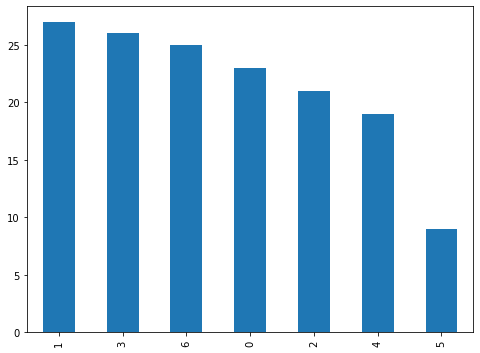

In [164]:
ClusterDF['ClusterID'].value_counts().plot(kind='bar')

#### Cluster Plots
Below written functions get utilized to plot 2-Dimensional and 3-Dimensional cluster plots on the available set of features in the dataset. Plots include different available clusters along with cluster centroid.

In [167]:
def Plot2DCluster(X_Cols,df):
    for i in list(itertools.combinations(X_Cols, 2)):
        plt.rcParams["figure.figsize"] = (8,6)
        xi,yi=df.columns.get_loc(i[0]),df.columns.get_loc(i[1])
        for j in df['ClusterID'].unique():
            DFC=df[df.ClusterID==j]
            plt.scatter(DFC[i[0]],DFC[i[1]],cmap=plt.cm.Accent,label=j)
        plt.scatter(kmeans.cluster_centers_[:,xi],kmeans.cluster_centers_[:,yi],marker="^",color="black",label="centroid")
        plt.xlabel(i[0])
        plt.ylabel(i[1])
        plt.legend()
        plt.show()

def Plot3DCluster(X_Cols,df):
    for i in list(itertools.combinations(X_Cols, 3)):
        xi,yi,zi=df.columns.get_loc(i[0]),df.columns.get_loc(i[1]),df.columns.get_loc(i[2])
        fig,ax = plt.figure(figsize = (16, 10)),plt.axes(projection ="3d")
        ax.grid(b = True, color ='grey',linestyle ='-.',linewidth = 0.3,alpha = 0.2)
        for j in df['ClusterID'].unique():
            DFC=df[df.ClusterID==j]
            ax.scatter3D(DFC[i[0]],DFC[i[1]],DFC[i[2]],alpha = 0.8,cmap=plt.cm.Accent,label=j)
        ax.scatter3D(kmeans.cluster_centers_[:,xi],kmeans.cluster_centers_[:,yi],kmeans.cluster_centers_[:,zi],
                     marker="^",color="black",label="centroid")
        ax.set_xlabel(i[0])
        ax.set_ylabel(i[1])
        ax.set_zlabel(i[2])
        plt.legend()
        plt.show()
    
def Plotly3D(X_Cols,df):
    for i in list(itertools.combinations(X_Cols,3)):
        xi,yi,zi=df.columns.get_loc(i[0]),df.columns.get_loc(i[1]),df.columns.get_loc(i[2])
        fig1 = px.scatter_3d(kmeans.cluster_centers_,x=kmeans.cluster_centers_[:,xi],y=kmeans.cluster_centers_[:,yi],
                             z=kmeans.cluster_centers_[:,zi])
        fig2=px.scatter_3d(df, x=i[0], y=i[1],z=i[2],color=df['ClusterID'])
        fig3 = go.Figure(data=fig1.data + fig2.data,
                         layout=go.Layout(title=go.layout.Title(text="x:{}, y:{}, z:{}".format(i[0],i[1],i[2])))
                        )
        fig3.show()

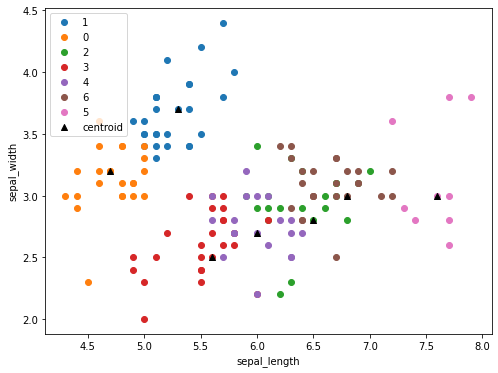

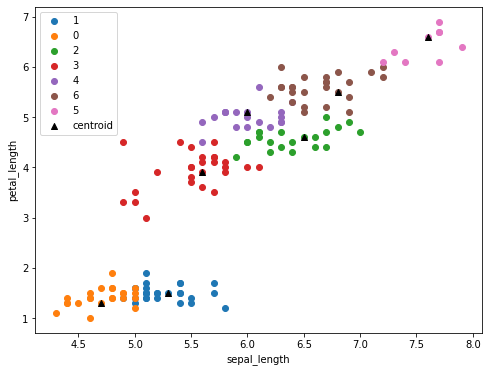

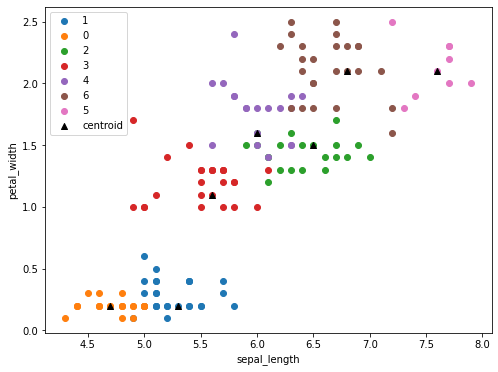

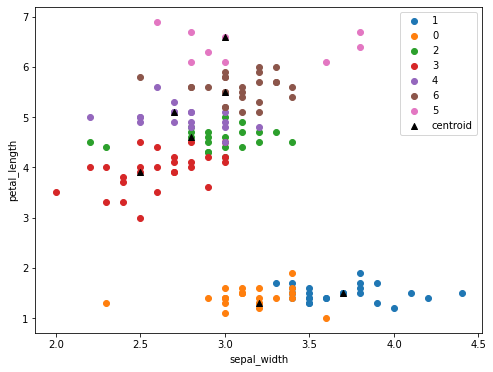

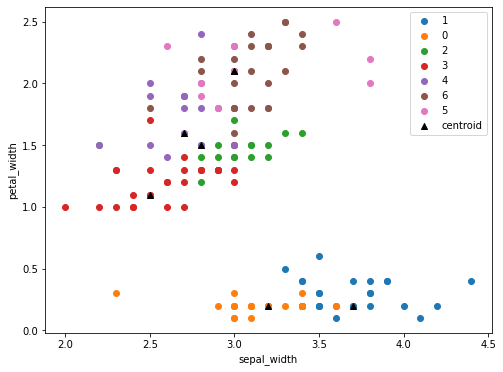

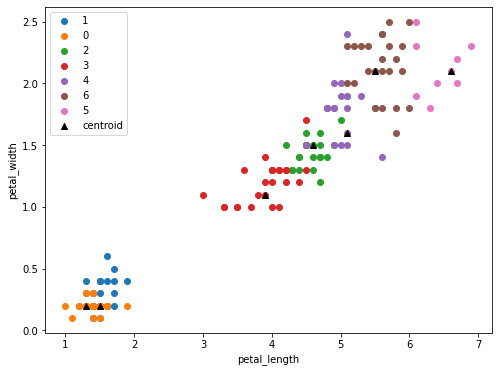

In [168]:
Plot2DCluster(X.columns,ClusterDF)

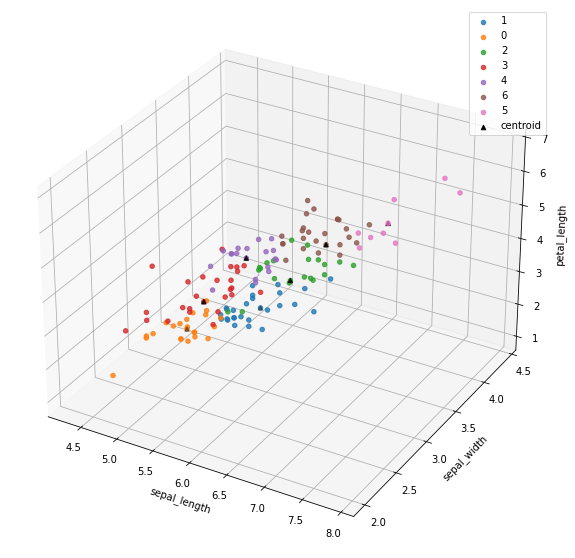

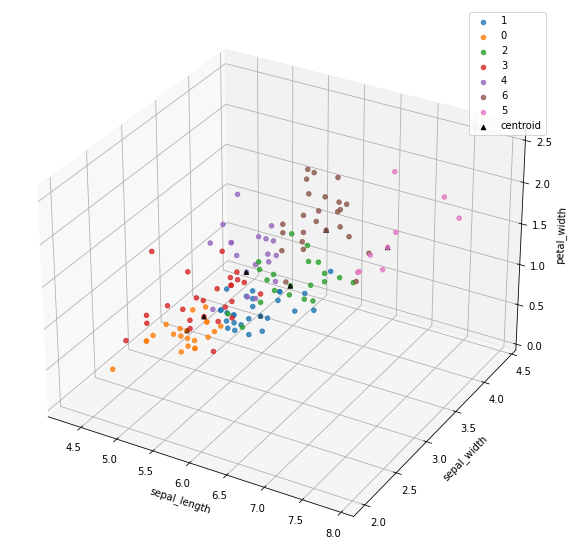

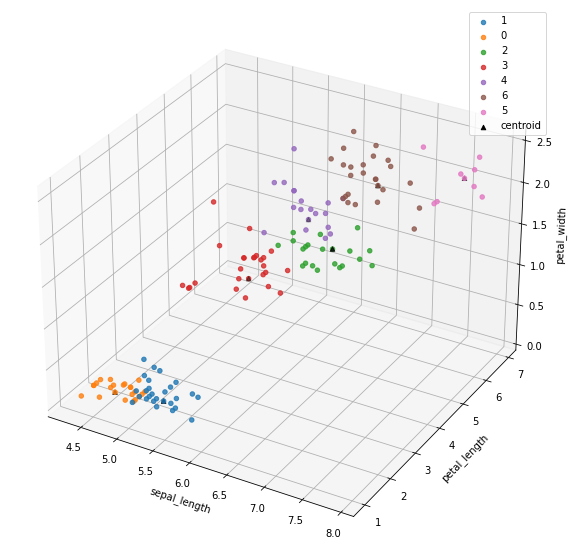

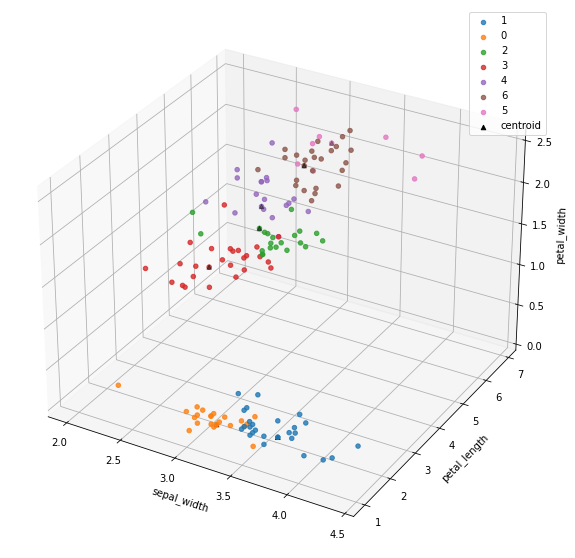

In [169]:
Plot3DCluster(X.columns,ClusterDF)

In [170]:
Plotly3D(X.columns,ClusterDF)


#### Creator: Jay Shimpi , Github: [Profile](https://github.com/JayShimpi22)
